In [1]:
import os
os.environ['USE_PYGEOS'] = '0' # only if you have pygeos

import geopandas as gpd
from  fiona import listlayers

#maps
worldMaps='https://github.com/CienciaDeDatosEspacial/code_and_data/raw/main/maps/worldMaps.gpkg'

#layers in maps
listlayers(worldMaps)

['countries', 'cities', 'rivers']

In [2]:
countries=gpd.read_file(worldMaps,layer='countries')
cities=gpd.read_file(worldMaps,layer='cities')
rivers=gpd.read_file(worldMaps,layer='rivers')

In [3]:
countries.crs.to_epsg()==cities.crs.to_epsg()==rivers.crs.to_epsg()

True

<AxesSubplot:>

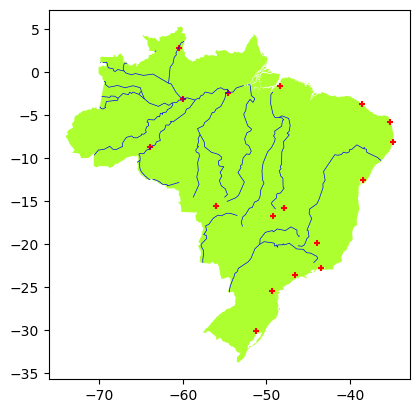

In [4]:
# just brazil
brazil=countries[countries.COUNTRY=='Brazil']

# clipping
brazil_cities= gpd.clip(gdf=cities,mask=brazil)
brazil_rivers = gpd.clip(gdf=rivers,mask=brazil)

# plotting
base = brazil.plot(facecolor="greenyellow")
brazil_rivers.plot(edgecolor='blue', linewidth=0.5,ax=base)
brazil_cities.plot(marker='+', color='red', markersize=15,ax=base)

In [5]:
# unit is in degrees:
brazil.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [6]:
# centroid
brazil.centroid

C:\Users\ISABELLA\AppData\Local\Temp\ipykernel_94928\515368123.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  brazil.centroid


29    POINT (-53.09009 -10.77302)
dtype: geometry

In [7]:
brazil.to_crs(3587).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [8]:
# operations that require projected CRS will work:
brazil.to_crs(3587).centroid

29    POINT (11374671.933 -6303368.608)
dtype: geometry

<AxesSubplot:>

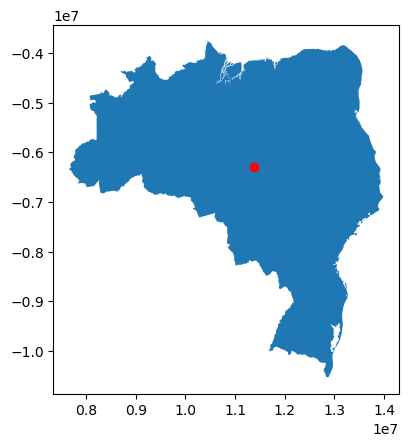

In [9]:
# plot this projected version

base3587=brazil.to_crs(3587).plot()
brazil.to_crs(3587).centroid.plot(color='red',ax=base3587)

In [10]:
# recommended for Brazil (meters)
brazil.to_crs(5641).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [11]:
# this works
brazil.to_crs(5641).centroid

29    POINT (3884486.179 8756856.093)
dtype: geometry

<AxesSubplot:>

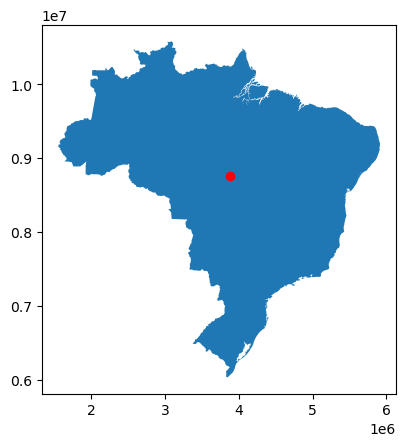

In [12]:
# replotting:

base5641=brazil.to_crs(5641).plot()
brazil.to_crs(5641).centroid.plot(color='red',ax=base5641)

C:\Users\ISABELLA\AppData\Local\Temp\ipykernel_94928\685079270.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  brazil.centroid.plot(color='red',ax=ax2)


<AxesSubplot:title={'center':'unprojected'}>

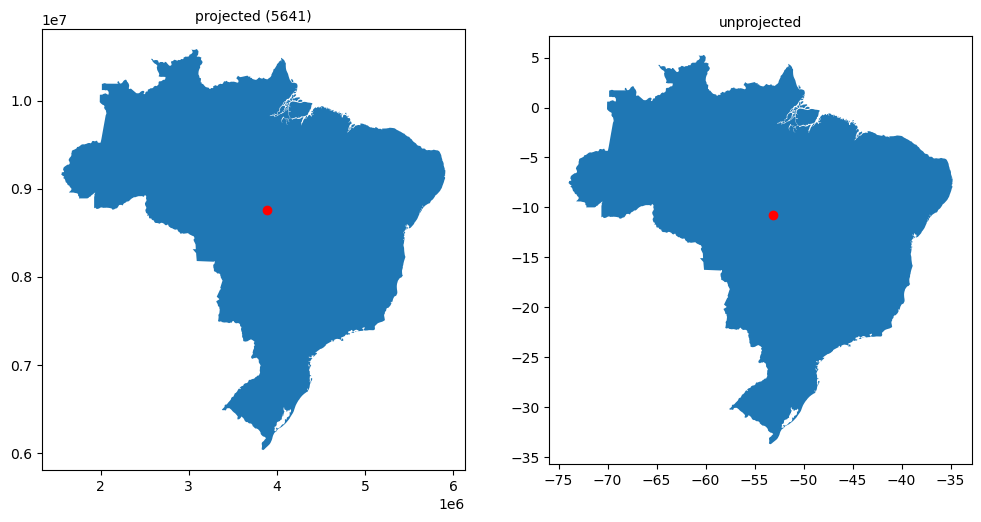

In [13]:
from matplotlib import pyplot

fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

ax1.set_title('projected (5641)',fontsize=10)
brazil.to_crs(5641).plot(ax=ax1)
brazil.to_crs(5641).centroid.plot(color='red',ax=ax1)

ax2.set_title('unprojected',fontsize=10)
brazil.plot(ax=ax2)
brazil.centroid.plot(color='red',ax=ax2)


In [14]:
brazil_5641=brazil.to_crs(5641)
# just Brazil

cities_5641=cities.to_crs(brazil_5641.crs)
cities_5641=cities_5641[cities_5641.COUNTRY=='Brazil']

rivers_5641=rivers.to_crs(brazil_5641.crs)
rivers_5641=gpd.clip(gdf=rivers_5641,mask=brazil_5641)

In [15]:
brazil_5641

COUNTRY                                           geometry
29  Brazil  MULTIPOLYGON (((1926257.542 8894978.397, 19262...

In [16]:
brazil_5641.boundary

29    MULTILINESTRING ((1926257.542 8894978.397, 192...
dtype: geometry

<AxesSubplot:>

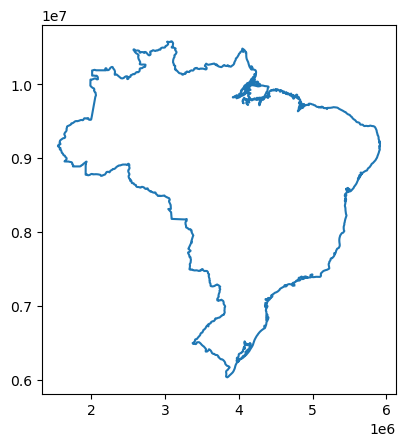

In [17]:
# This is just the borderline
brazil_5641.boundary.plot()

In [18]:
# does 'boundary' return a GDF?
type(brazil_5641.boundary)

geopandas.geoseries.GeoSeries

In [19]:
# converting into GDF
brazil_5641.boundary.to_frame()

0
29  MULTILINESTRING ((1926257.542 8894978.397, 192...

In [20]:
# conversion
brazil_5641DF=brazil_5641.boundary.to_frame() 

# new column (optional)
brazil_5641DF['name']='Brazil' 

# renaming the geometry column
brazil_5641DF.rename(columns={0:'geometry'},inplace=True) 

#setting the geometry (the name is not enough)
brazil_5641DF = brazil_5641DF.set_geometry("geometry")

# verifying:
brazil_5641DF.crs

<Projected CRS: EPSG:5641>
Name: SIRGAS 2000 / Brazil Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Brazil - offshore - equatorial margin.
- bounds: (-51.64, -5.74, -32.43, 7.04)
Coordinate Operation:
- name: Petrobras Mercator
- method: Mercator (variant B)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [21]:
brazil_states=gpd.read_file(os.path.join("mapas","bra_adm_ibge_2020_shp","bra_admbnda_adm1_ibge_2020.shp"))
brazil_municipalities=gpd.read_file(os.path.join("mapas","bra_adm_ibge_2020_shp","bra_admbnda_adm2_ibge_2020.shp"))

In [22]:
brazil_states.crs, brazil_municipalities.crs

(None, None)

<AxesSubplot:>

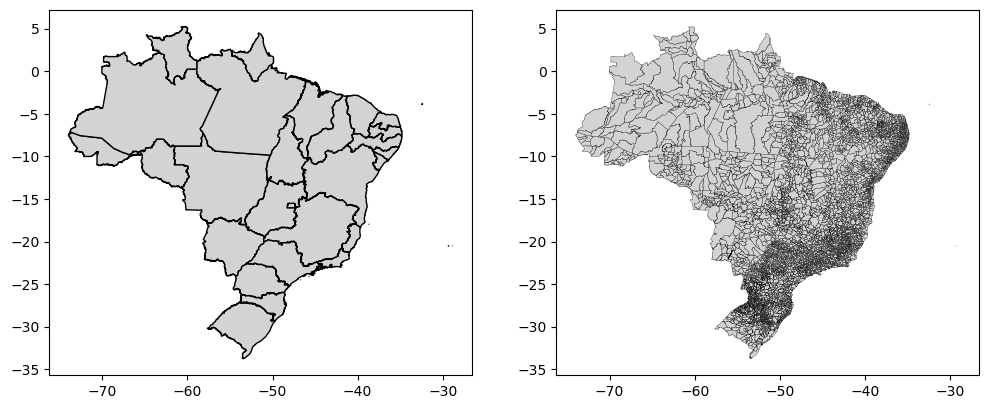

In [23]:
fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

brazil_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
brazil_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [24]:
brazil_states

ADM0_EN ADM0_PT ADM0_PCODE              ADM1_PT ADM1_PCODE  \
0   Brazil  Brasil         BR                 Acre       BR12   
1   Brazil  Brasil         BR              Alagoas       BR27   
2   Brazil  Brasil         BR                Amapá       BR16   
3   Brazil  Brasil         BR             Amazonas       BR13   
4   Brazil  Brasil         BR                Bahia       BR29   
5   Brazil  Brasil         BR                Ceará       BR23   
6   Brazil  Brasil         BR     Distrito Federal       BR53   
7   Brazil  Brasil         BR       Espírito Santo       BR32   
8   Brazil  Brasil         BR                Goiás       BR52   
9   Brazil  Brasil         BR             Maranhão       BR21   
10  Brazil  Brasil         BR          Mato Grosso       BR51   
11  Brazil  Brasil         BR   Mato Grosso do Sul       BR50   
12  Brazil  Brasil         BR         Minas Gerais       BR31   
13  Brazil  Brasil         BR                 Pará       BR15   
14  Brazil  Brasil         BR              Paraíba       BR25   
15  Brazil  Brasil         BR               Paraná       BR41   
16  Brazil  Brasil         BR           Pernambuco       BR26   
17  Brazil  Brasil         BR                Piauí       BR22   
18  Brazil  Brasil         BR       Rio de Janeiro       BR33   
19  Brazil  Brasil         BR  Rio Grande do Norte       BR24   
20  Brazil  Brasil         BR    Rio Grande do Sul       BR43   
21  Brazil  Brasil         BR             Rondônia       BR11   
22  Brazil  Brasil         BR              Roraima       BR14   
23  Brazil  Brasil         BR       Santa Catarina       BR42   
24  Brazil  Brasil         BR            São Paulo       BR35   
25  Brazil  Brasil         BR              Sergipe       BR28   
26  Brazil  Brasil         BR            Tocantins       BR17   

                                             geometry  
0   MULTIPOLYGON (((-68.87747 -11.01987, -68.88027...  
1   POLYGON ((-35.46317 -8.82467, -35.46457 -8.828...  
2   MULTIPOLYGON (((-50.46147 2.11133, -50.45627 2...  
3   MULTIPOLYGON (((-58.49367 -0.84197, -58.48917 ...  
4   MULTIPOLYGON (((-38.70687 -17.96447, -38.70867...  
5   MULTIPOLYGON (((-39.90847 -2.87407, -39.91257 ...  
6   POLYGON ((-47.37689 -15.88092, -47.37781 -15.8...  
7   MULTIPOLYGON (((-29.29937 -20.51987, -29.30147...  
8   MULTIPOLYGON (((-47.28117 -17.12687, -47.27627...  
9   MULTIPOLYGON (((-47.03127 -8.98527, -47.03537 ...  
10  MULTIPOLYGON (((-56.65037 -17.32567, -56.64427...  
11  MULTIPOLYGON (((-57.45677 -22.18997, -57.45467...  
12  MULTIPOLYGON (((-47.14037 -17.00607, -47.14357...  
13  MULTIPOLYGON (((-46.43447 -1.01537, -46.43887 ...  
14  MULTIPOLYGON (((-34.86147 -6.98137, -34.85677 ...  
15  MULTIPOLYGON (((-49.54087 -26.22697, -49.53667...  
16  MULTIPOLYGON (((-34.96727 -8.37597, -34.96567 ...  
17  POLYGON ((-41.78067 -2.76077, -41.77927 -2.764...  
18  MULTIPOLYGON (((-44.62767 -23.34227, -44.62767...  
19  POLYGON ((-37.14907 -4.94937, -37.14517 -4.949...  
20  MULTIPOLYGON (((-49.98467 -29.13687, -49.98147...  
21  MULTIPOLYGON (((-60.09197 -11.85667, -60.09377...  
22  POLYGON ((-60.19277 5.25133, -60.19557 5.24113...  
23  MULTIPOLYGON (((-50.03477 -29.34877, -50.03807...  
24  MULTIPOLYGON (((-47.85927 -25.12547, -47.86297...  
25  POLYGON ((-37.97697 -9.53127, -37.97347 -9.532...  
26  POLYGON ((-47.03127 -8.98527, -47.03177 -8.979...

In [25]:
brazil_states.geometry

0     MULTIPOLYGON (((-68.87747 -11.01987, -68.88027...
1     POLYGON ((-35.46317 -8.82467, -35.46457 -8.828...
2     MULTIPOLYGON (((-50.46147 2.11133, -50.45627 2...
3     MULTIPOLYGON (((-58.49367 -0.84197, -58.48917 ...
4     MULTIPOLYGON (((-38.70687 -17.96447, -38.70867...
5     MULTIPOLYGON (((-39.90847 -2.87407, -39.91257 ...
6     POLYGON ((-47.37689 -15.88092, -47.37781 -15.8...
7     MULTIPOLYGON (((-29.29937 -20.51987, -29.30147...
8     MULTIPOLYGON (((-47.28117 -17.12687, -47.27627...
9     MULTIPOLYGON (((-47.03127 -8.98527, -47.03537 ...
10    MULTIPOLYGON (((-56.65037 -17.32567, -56.64427...
11    MULTIPOLYGON (((-57.45677 -22.18997, -57.45467...
12    MULTIPOLYGON (((-47.14037 -17.00607, -47.14357...
13    MULTIPOLYGON (((-46.43447 -1.01537, -46.43887 ...
14    MULTIPOLYGON (((-34.86147 -6.98137, -34.85677 ...
15    MULTIPOLYGON (((-49.54087 -26.22697, -49.53667...
16    MULTIPOLYGON (((-34.96727 -8.37597, -34.96567 ...
17    POLYGON ((-41.78067 -2.76077, -41.77927 -2

In [26]:
brazil_states.crs = "EPSG:4326"
brazil_municipalities.crs = "EPSG:4326"

In [27]:
brazil_states_5641=brazil_states.to_crs(5641)
brazil_municipalities_5641=brazil_municipalities.to_crs(5641)

<AxesSubplot:title={'center':'Below_Centroid, RightOf_Centroid'}>

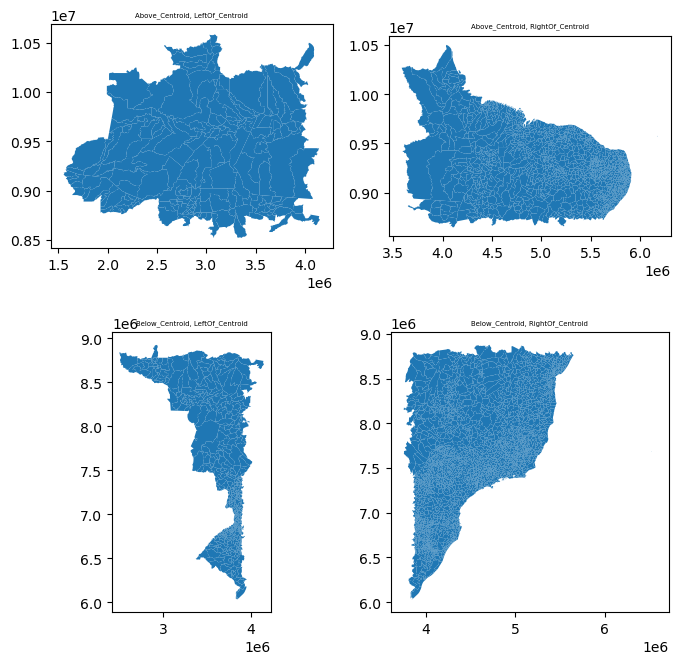

In [28]:
centroBrazil=brazil_5641.centroid


fig, axs = pyplot.subplots(nrows=2,ncols=2,sharex=False, sharey=False,figsize=(8,8))

axs[0,0].set_title('Above_Centroid, LeftOf_Centroid',fontsize=5)
brazil_municipalities_5641.cx[:centroBrazil.x,centroBrazil.y:].plot(ax=axs[0,0]) 

axs[0,1].set_title('Above_Centroid, RightOf_Centroid',fontsize=5)
brazil_municipalities_5641.cx[centroBrazil.x:,centroBrazil.y:].plot(ax=axs[0,1]) 

axs[1,0].set_title('Below_Centroid, LeftOf_Centroid',fontsize=5)
brazil_municipalities_5641.cx[:centroBrazil.x,:centroBrazil.y].plot(ax=axs[1,0]) 

axs[1,1].set_title('Below_Centroid, RightOf_Centroid',fontsize=5)
brazil_municipalities_5641.cx[centroBrazil.x:,:centroBrazil.y].plot(ax=axs[1,1]) 

In [29]:
#instead of:
brazil_municipalities_5641.cx[:centroBrazil.x,centroBrazil.y:]

ADM0_EN ADM0_PT ADM0_PCODE      ADM1_PT ADM1_PCODE  \
1     Brazil  Brasil         BR     Rondônia       BR11   
3     Brazil  Brasil         BR     Rondônia       BR11   
8     Brazil  Brasil         BR     Rondônia       BR11   
9     Brazil  Brasil         BR     Rondônia       BR11   
10    Brazil  Brasil         BR     Rondônia       BR11   
...      ...     ...        ...          ...        ...   
5305  Brazil  Brasil         BR  Mato Grosso       BR51   
5310  Brazil  Brasil         BR  Mato Grosso       BR51   
5313  Brazil  Brasil         BR  Mato Grosso       BR51   
5321  Brazil  Brasil         BR  Mato Grosso       BR51   
5324  Brazil  Brasil         BR  Mato Grosso       BR51   

                    ADM2_PT ADM2_PCODE  ET_ID  \
1                 Ariquemes  BR1100023      1   
3                    Cacoal  BR1100049      3   
8           Espigão D'Oeste  BR1100098      8   
9             Guajará-Mirim  BR1100106      9   
10                     Jaru  BR1100114     10   
...                     ...        ...    ...   
5305  São Félix do Araguaia  BR5107859   5305   
5310               Tabaporã  BR5107941   5310   
5313    Terra Nova do Norte  BR5108055   5313   
5321           Nova Guarita  BR5108808   5321   
5324       Nova Monte Verde  BR5108956   5324   

                                               geometry  
1     POLYGON ((2839173.154 8911097.984, 2838718.204...  
3     POLYGON ((2997393.730 8777661.276, 2997393.730...  
8     POLYGON ((3057637.194 8777929.305, 3056978.535...  
9     MULTIPOLYGON (((2708460.048 8727087.796, 27089...  
10    POLYGON ((2871236.909 8863979.571, 2871101.103...  
...                                                 ...  
5305  POLYGON ((3974265.397 8773180.057, 3974197.494...  
5310  POLYGON ((3505714.931 8812411.339, 3505972.962...  
5313  POLYGON ((3647944.371 8863821.903, 3657430.408...  
5321  POLYGON ((3638016.966 8872883.250, 3638098.449...  
5324  POLYGON ((3449722.190 8896410.060, 3449477.739...  

[191 rows x 9 columns]

In [30]:
# you create
Brazil_topLeft=brazil_municipalities_5641.cx[:centroBrazil.x,centroBrazil.y:].dissolve()
# you get
Brazil_topLeft

geometry ADM0_EN ADM0_PT  \
0  MULTIPOLYGON (((2833306.342 8711802.956, 28331...  Brazil  Brasil   

  ADM0_PCODE   ADM1_PT ADM1_PCODE    ADM2_PT ADM2_PCODE  ET_ID  
0         BR  Rondônia       BR11  Ariquemes  BR1100023      1

In [31]:
Brazil_topLeft['zone']='NW'
Brazil_topLeft=Brazil_topLeft.loc[:,['ADM0_EN','zone','geometry']]   
Brazil_topLeft

ADM0_EN zone                                           geometry
0  Brazil   NW  MULTIPOLYGON (((2833306.342 8711802.956, 28331...

<AxesSubplot:>

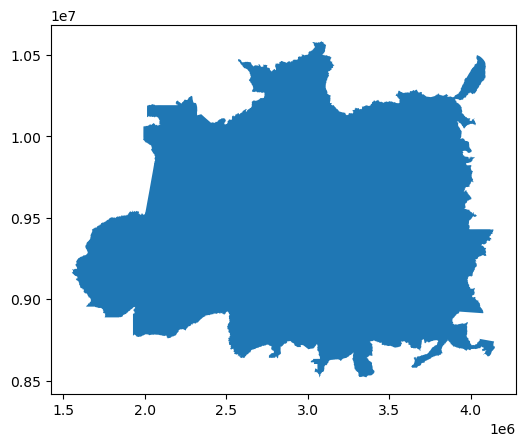

In [32]:
# this is the plot

Brazil_topLeft.plot()

In [33]:
rowsCX=(brazil_municipalities_5641.cx[:centroBrazil.x,centroBrazil.y:].shape[0],\
brazil_municipalities_5641.cx[centroBrazil.x:,centroBrazil.y:].shape[0],\
brazil_municipalities_5641.cx[:centroBrazil.x,:centroBrazil.y].shape[0],\
brazil_municipalities_5641.cx[centroBrazil.x:,:centroBrazil.y].shape[0])
sum(rowsCX)

5753

In [34]:
sum(rowsCX)-brazil_municipalities_5641.shape[0]

181

In [35]:
import pandas as pd 
infoairports=pd.read_csv(os.path.join("data","br-airports.csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail

id        ident                 type  \
0     #meta +id  #meta +code  #loc +airport +type   
1          5910         SBGR        large_airport   
2          5906         SBGL        large_airport   
3          5974         SBSP       medium_airport   
6693     309669         SSVR               closed   
6694     505308      BR-1760             heliport   
6695     341727      BR-1429             heliport   
6696     343017      BR-1493             heliport   

                                                   name latitude_deg  \
0                                   #loc +airport +name    #geo +lat   
1     Guarulhos - Governador André Franco Montoro In...   -23.431944   
2          Rio Galeão – Tom Jobim International Airport   -22.809999   
3                                     Congonhas Airport   -23.627657   
6693                              Volta Redonda Airport     -22.4978   
6694                       Unimed Volta Redonda Helipad   -22.533988   
6695                              Santa Helena Heliport    -23.59851   
6696              Bandeiras Centro Empresarial Heliport   -23.536615   

     longitude_deg         elevation_ft                 continent  \
0        #geo +lon  #geo +elevation +ft  #region +continent +code   
1       -46.467778                 2461                        SA   
2       -43.250557                   28                        SA   
3       -46.654601                 2631                        SA   
6693       -44.085                 1245                        SA   
6694    -44.076918                 1385                        SA   
6695    -47.441196                 2254                        SA   
6696    -47.449475                 1827                        SA   

        country_name           iso_country  ...              municipality  \
0     #country +name  #country +code +iso2  ...  #loc +municipality +name   
1             Brazil                    BR  ...                 São Paulo   
2             Brazil                    BR  ...            Rio De Janeiro   
3             Brazil                    BR  ...                 São Paulo   
6693          Brazil                    BR  ...             Volta Redonda   
6694          Brazil                    BR  ...             Volta Redonda   
6695          Brazil                    BR  ...                Votorantim   
6696          Brazil                    BR  ...                Votorantim   

       scheduled_service                  gps_code                  iata_code  \
0     #status +scheduled  #loc +airport +code +gps  #loc +airport +code +iata   
1                      1                      SBGR                        GRU   
2                      1                      SBGL                        GIG   
3                      1                      SBSP                        CGH   
6693                   0                       NaN                        NaN   
6694                   0                      SSKV                        NaN   
6695                   0                      SWHE                        NaN   
6696                   0                      SWST                        NaN   

                      local_code  \
0     #loc +airport +code +local   
1                         SP0002   
2                         RJ0001   
3                         SP0001   
6693                         NaN   
6694                      RJ0147   
6695                      SP0807   
6696                      SP1306   

                                              home_link  \
0                                   #meta +url +airport   
1                    http://www.aeroportoguarulhos.net/   
2                                                   NaN   
3     http://www.infraero.gov.br/usa/aero_prev_home....   
6693                                                NaN   
6694                                                NaN   
6695                                                NaN   
6696                                       

In [36]:
# bye first row 
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

id ident            type  \
0  5910  SBGR   large_airport   
1  5906  SBGL   large_airport   
2  5974  SBSP  medium_airport   
3  5967  SBRJ  medium_airport   
4  5872  SBBR   large_airport   

                                                name latitude_deg  \
0  Guarulhos - Governador André Franco Montoro In...   -23.431944   
1       Rio Galeão – Tom Jobim International Airport   -22.809999   
2                                  Congonhas Airport   -23.627657   
3                              Santos Dumont Airport     -22.9105   
4  Presidente Juscelino Kubitschek International ...   -15.869167   

  longitude_deg elevation_ft continent country_name iso_country  ...  \
0    -46.467778         2461        SA       Brazil          BR  ...   
1    -43.250557           28        SA       Brazil          BR  ...   
2    -46.654601         2631        SA       Brazil          BR  ...   
3    -43.163101           11        SA       Brazil          BR  ...   
4    -47.920834         3497        SA       Brazil          BR  ...   

     municipality scheduled_service gps_code iata_code local_code  \
0       São Paulo                 1     SBGR       GRU     SP0002   
1  Rio De Janeiro                 1     SBGL       GIG     RJ0001   
2       São Paulo                 1     SBSP       CGH     SP0001   
3  Rio de Janeiro                 1     SBRJ       SDU     RJ0002   
4        Brasília                 1     SBBR       BSB     DF0001   

                                           home_link  \
0                 http://www.aeroportoguarulhos.net/   
1                                                NaN   
2  http://www.infraero.gov.br/usa/aero_prev_home....   
3  https://www4.infraero.gov.br/aeroportos/aeropo...   
4  http://www.infraero.gov.br/usa/aero_prev_home....   

                                      wikipedia_link  \
0  https://en.wikipedia.org/wiki/S%C3%A3o_Paulo-G...   
1  https://en.wikipedia.org/wiki/Rio_de_Janeiro-G...   
2  https://en.wikipedia.org/wiki/Congonhas-S%C3%A...   
3  https://en.wikipedia.org/wiki/Santos_Dumont_Ai...   
4  https://en.wikipedia.org/wiki/Bras%C3%ADlia_In...   

                                            keywords    score  \
0                                            Cumbica  1016675   
1  Galeão - Antônio Carlos Jobim International Ai...    51475   
2  http://www.infraero.gov.br/usa/aero_prev_home....      750   
3                                                RIO      750   
4                                                NaN    51275   

                last_updated  
0  2021-10-28T15:52:55+00:00  
1  2021-10-14T18:09:35+00:00  
2  2022-05-03T20:10:35+00:00  
3  2022-03-28T23:27:00+00:00  
4  2020-08-24T11:15:12+00:00  

[5 rows x 23 columns]

In [37]:
# keep the  columns needed

infoairports.columns.to_list()

['id',
 'ident',
 'type',
 'name',
 'latitude_deg',
 'longitude_deg',
 'elevation_ft',
 'continent',
 'country_name',
 'iso_country',
 'region_name',
 'iso_region',
 'local_region',
 'municipality',
 'scheduled_service',
 'gps_code',
 'iata_code',
 'local_code',
 'home_link',
 'wikipedia_link',
 'keywords',
 'score',
 'last_updated']

In [38]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6696 entries, 0 to 6695
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           6696 non-null   object
 1   type           6696 non-null   object
 2   latitude_deg   6696 non-null   object
 3   longitude_deg  6696 non-null   object
 4   elevation_ft   6525 non-null   object
 5   region_name    6696 non-null   object
 6   municipality   6672 non-null   object
dtypes: object(7)
memory usage: 366.3+ KB


In [39]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now 
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6696 entries, 0 to 6695
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6696 non-null   object 
 1   type           6696 non-null   object 
 2   latitude_deg   6696 non-null   float64
 3   longitude_deg  6696 non-null   float64
 4   elevation_ft   6525 non-null   float64
 5   region_name    6696 non-null   object 
 6   municipality   6672 non-null   object 
dtypes: float64(3), object(4)
memory usage: 366.3+ KB


<AxesSubplot:xlabel='longitude_deg', ylabel='latitude_deg'>

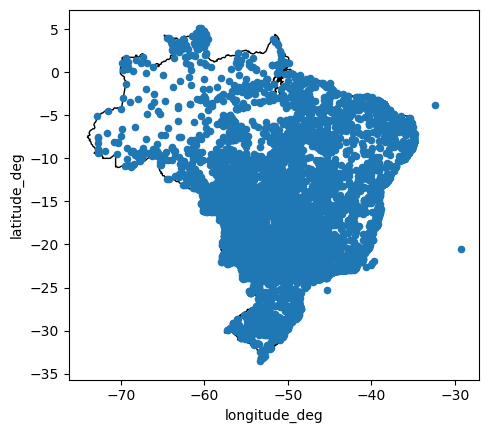

In [40]:
# let's plot

base = brazil.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [41]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=brazil.crs.to_epsg())# the coordinates were in degrees - unprojected

<AxesSubplot:>

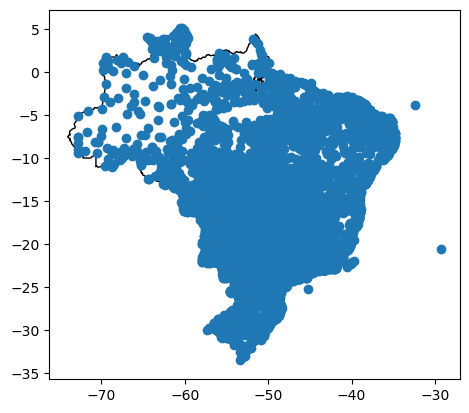

In [42]:
# does it look better?

# let's plot

base = brazil.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [43]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<AxesSubplot:>

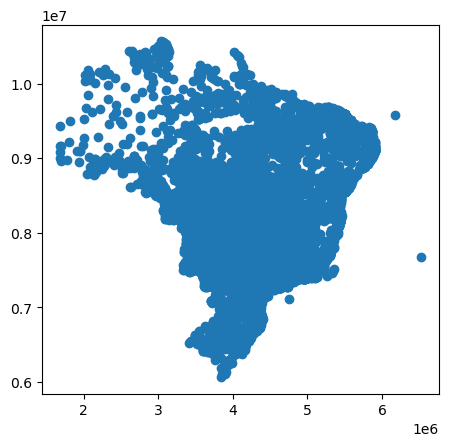

In [44]:
airports.to_crs(5641).plot()

In [46]:
airports_5641=airports.to_crs(5641)

In [47]:
airports_5641['type'].value_counts() # this will not work: airports.type.value_counts()

small_airport     4608
heliport          1701
closed             253
medium_airport     124
large_airport        8
seaplane_base        2
Name: type, dtype: int64

In [48]:
airports_5641.rename(columns={'type':'kind'},inplace=True)

In [49]:
from folium import LayerControl


m = airports_5641[airports_5641.kind=='small_airport'].explore(color="red",name="small",show=False)
m = airports_5641[airports_5641.kind=='medium_airport'].explore(m=m, color="blue",name="medium",show=False)
m = airports_5641[airports_5641.kind=='large_airport'].explore(m=m, color="black",name="large",show=True)
m = airports_5641[airports_5641.kind=='seaplane_base'].explore(m=m, color="green",name="seaplane",show=False)
m = airports_5641[airports_5641.kind=='closed'].explore(m=m, color="white",name="closed",show=False)
m = airports_5641[airports_5641.kind=='heliport'].explore(m=m, color="orange",name="heliport",show=False)

LayerControl(collapsed=False).add_to(m) #optional

m

In [50]:
# in a polygon
Brazil_topLeft

ADM0_EN zone                                           geometry
0  Brazil   NW  MULTIPOLYGON (((2833306.342 8711802.956, 28331...

<AxesSubplot:>

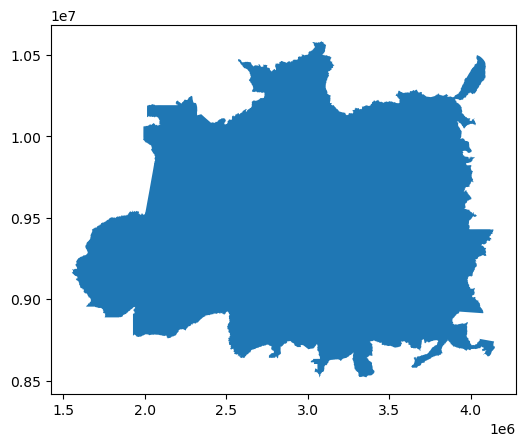

In [51]:
Brazil_topLeft.plot()

In [52]:
Brazil_topLeft.convex_hull

0    POLYGON ((3071557.291 8521541.630, 3070932.584...
dtype: geometry

<AxesSubplot:>

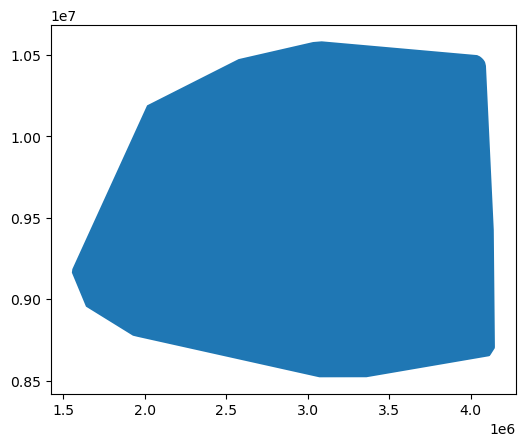

In [53]:
Brazil_topLeft.convex_hull.plot()

In [54]:
large_airport=airports_5641[airports_5641.kind=='large_airport']
# several rows
large_airport

name           kind  \
0   Guarulhos - Governador André Franco Montoro In...  large_airport   
1        Rio Galeão – Tom Jobim International Airport  large_airport   
4   Presidente Juscelino Kubitschek International ...  large_airport   
5   Deputado Luiz Eduardo Magalhães International ...  large_airport   
9                Tancredo Neves International Airport  large_airport   
10                Eduardo Gomes International Airport  large_airport   
14                 Hercílio Luz International Airport  large_airport   
16  Val de Cans/Júlio Cezar Ribeiro International ...  large_airport   

    latitude_deg  longitude_deg  elevation_ft       region_name  \
0     -23.431944     -46.467778        2461.0         São Paulo   
1     -22.809999     -43.250557          28.0    Rio de Janeiro   
4     -15.869167     -47.920834        3497.0  Distrito Federal   
5     -12.908611     -38.322498          64.0             Bahia   
9     -19.635710     -43.966928        2721.0      Minas Gerais   
10     -3.038610     -60.049702         264.0          Amazonas   
14    -27.670279     -48.552502          16.0    Santa Catarina   
16     -1.379279     -48.476207          54.0              Pará   

      municipality                         geometry  
0        São Paulo  POINT (4614202.306 7334259.930)  
1   Rio De Janeiro  POINT (4972125.000 7409069.810)  
4         Brasília  POINT (4452546.729 8223176.558)  
5         Salvador  POINT (5520382.068 8561117.560)  
9   Belo Horizonte  POINT (4892427.199 7785766.984)  
10          Manaus  POINT (3103184.311 9664051.584)  
14   Florianópolis  POINT (4382272.317 6814299.684)  
16           Belém  POINT (4390760.299 9847564.588)

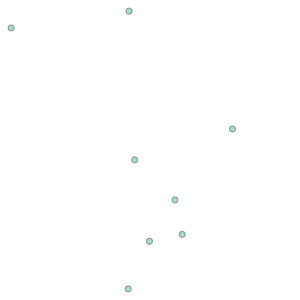

In [55]:
large_airport.unary_union

In [56]:
gpd.GeoSeries(large_airport.unary_union)

0    MULTIPOINT (3103184.311 9664051.584, 4382272.3...
dtype: geometry

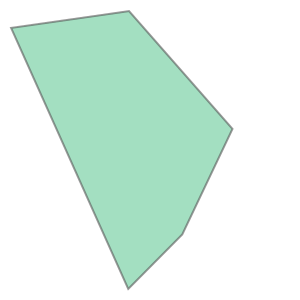

In [57]:
large_airport.unary_union.convex_hull

In [58]:
type(large_airport.unary_union.convex_hull)

shapely.geometry.polygon.Polygon

In [59]:
large_airport.unary_union.convex_hull.plot()

AttributeError: 'Polygon' object has no attribute 'plot'

<AxesSubplot:>

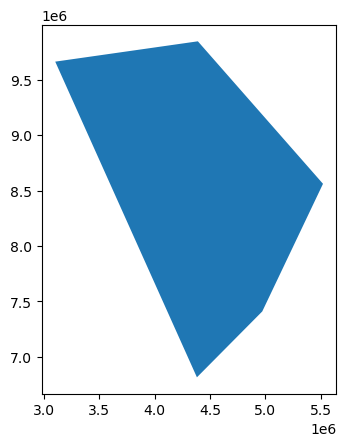

In [60]:
# but it will for a series
gpd.GeoSeries(large_airport.unary_union.convex_hull).plot()

In [61]:
# as gdf
LargeAirport_hull=gpd.GeoSeries(large_airport.unary_union.convex_hull).to_frame()
LargeAirport_hull

0
0  POLYGON ((4382272.317 6814299.684, 3103184.311...

In [62]:
#next steps
LargeAirport_hull.rename(columns={0:'geometry'},inplace=True)
LargeAirport_hull['name']='large airports hull' # optional
LargeAirport_hull=LargeAirport_hull.set_geometry('geometry')
LargeAirport_hull.crs="EPSG:5641"
# verifying:
LargeAirport_hull.crs

<Projected CRS: EPSG:5641>
Name: SIRGAS 2000 / Brazil Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Brazil - offshore - equatorial margin.
- bounds: (-51.64, -5.74, -32.43, 7.04)
Coordinate Operation:
- name: Petrobras Mercator
- method: Mercator (variant B)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

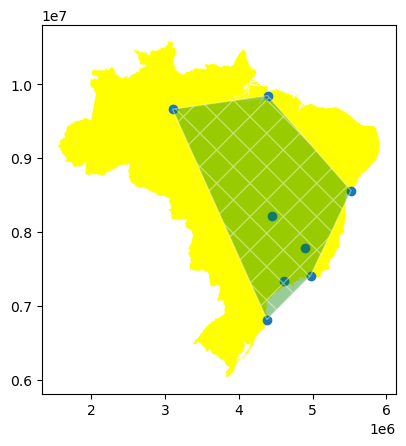

In [63]:
base=brazil_5641.plot(facecolor='yellow')
large_airport.plot(ax=base)
LargeAirport_hull.plot(ax=base,facecolor='green',
                       edgecolor='white',alpha=0.4,
                       hatch='X')

In [64]:
LargeAirport_hull.explore()

In [65]:
# non valid
brazil_states_5641[~brazil_states_5641.is_valid]

ADM0_EN ADM0_PT ADM0_PCODE             ADM1_PT ADM1_PCODE  \
0   Brazil  Brasil         BR                Acre       BR12   
4   Brazil  Brasil         BR               Bahia       BR29   
8   Brazil  Brasil         BR               Goiás       BR52   
10  Brazil  Brasil         BR         Mato Grosso       BR51   
11  Brazil  Brasil         BR  Mato Grosso do Sul       BR50   
12  Brazil  Brasil         BR        Minas Gerais       BR31   
13  Brazil  Brasil         BR                Pará       BR15   
15  Brazil  Brasil         BR              Paraná       BR41   
18  Brazil  Brasil         BR      Rio de Janeiro       BR33   
21  Brazil  Brasil         BR            Rondônia       BR11   
23  Brazil  Brasil         BR      Santa Catarina       BR42   
26  Brazil  Brasil         BR           Tocantins       BR17   

                                             geometry  
0   MULTIPOLYGON (((2121076.536 8774544.241, 21207...  
4   MULTIPOLYGON (((5477620.095 7981004.282, 54774...  
8   MULTIPOLYGON (((4523710.944 8078141.731, 45242...  
10  MULTIPOLYGON (((3481367.473 8055127.595, 34820...  
11  MULTIPOLYGON (((3391653.754 7483306.350, 33918...  
12  MULTIPOLYGON (((4539375.244 8092113.995, 45390...  
13  MULTIPOLYGON (((4617908.124 9887788.345, 46174...  
15  MULTIPOLYGON (((4272314.502 6993478.644, 42727...  
18  MULTIPOLYGON (((4818918.475 7345068.157, 48189...  
21  MULTIPOLYGON (((3098482.137 8680172.092, 30982...  
23  MULTIPOLYGON (((4217367.074 6602883.454, 42169...  
26  POLYGON ((4551512.852 9002911.855, 4551457.225...

<AxesSubplot:>

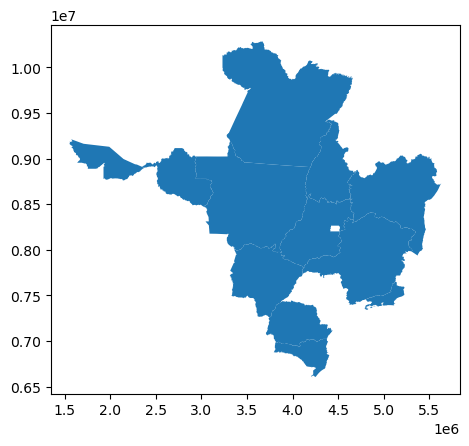

In [66]:
# see the invalid:
brazil_states_5641[~brazil_states_5641.is_valid].plot()

In [67]:
# what is wrong?

from shapely.validation import explain_validity, make_valid

explain_validity(brazil_states_5641[~brazil_states_5641.is_valid].geometry)

0     Ring Self-intersection[2332666.96482957 886800...
4     Ring Self-intersection[4742855.39250743 834160...
8     Ring Self-intersection[4539375.24395716 809211...
10    Ring Self-intersection[3593932.379873 8052498....
11    Ring Self-intersection[3481367.47320096 805512...
12    Ring Self-intersection[4537406.08122925 808948...
13    Ring Self-intersection[4595479.69388275 968288...
15    Ring Self-intersection[4247015.76753548 700800...
18    Ring Self-intersection[4976217.86358401 740193...
21    Ring Self-intersection[3068510.81312985 851673...
23    Ring Self-intersection[4222940.80627453 662976...
26    Ring Self-intersection[4626563.53942947 868935...
Name: geometry, dtype: object

In [69]:
BrSt5641_valid=brazil_states_5641[~brazil_states_5641.is_valid].copy()
# solving the issue:
BrSt5641_valid['geometry'] = [make_valid(row)  if not row.is_valid else row for row in BrSt5641_valid['geometry']]

In [70]:
# any invalid?
BrSt5641_valid[~BrSt5641_valid.is_valid]

Empty GeoDataFrame
Columns: [ADM0_EN, ADM0_PT, ADM0_PCODE, ADM1_PT, ADM1_PCODE, geometry]
Index: []

In [71]:
brazil_municipalities_5641[~brazil_municipalities_5641.is_valid]

ADM0_EN ADM0_PT ADM0_PCODE   ADM1_PT ADM1_PCODE                 ADM2_PT  \
5     Brazil  Brasil         BR  Rondônia       BR11       Colorado do Oeste   
15    Brazil  Brasil         BR  Rondônia       BR11           Pimenta Bueno   
16    Brazil  Brasil         BR  Rondônia       BR11             Porto Velho   
22    Brazil  Brasil         BR  Rondônia       BR11   São Miguel do Guaporé   
36    Brazil  Brasil         BR  Rondônia       BR11         Itapuã do Oeste   
...      ...     ...        ...       ...        ...                     ...   
5464  Brazil  Brasil         BR     Goiás       BR52               Matrinchã   
5470  Brazil  Brasil         BR     Goiás       BR52   Monte Alegre de Goiás   
5471  Brazil  Brasil         BR     Goiás       BR52  Montes Claros de Goiás   
5496  Brazil  Brasil         BR     Goiás       BR52          Padre Bernardo   
5512  Brazil  Brasil         BR     Goiás       BR52               Pontalina   

     ADM2_PCODE  ET_ID                                           geometry  
5     BR1100064      5  POLYGON ((3071557.291 8521541.630, 3071367.162...  
15    BR1100189     15  POLYGON ((3057168.663 8724320.552, 3056869.891...  
16    BR1100205     16  POLYGON ((2856305.059 9048717.998, 2857038.410...  
22    BR1100320     22  POLYGON ((2753262.389 8765192.063, 2753595.113...  
36    BR1101104     36  POLYGON ((2801256.168 9023884.917, 2801099.991...  
...         ...    ...                                                ...  
5464  BR5212956   5464  POLYGON ((4141197.917 8313421.144, 4140885.563...  
5470  BR5213509   5470  POLYGON ((4616158.417 8544511.406, 4616233.111...  
5471  BR5213707   5471  MULTIPOLYGON (((4066884.969 8218654.089, 40667...  
5496  BR5215603   5496  POLYGON ((4404321.702 8311359.407, 4404056.880...  
5512  BR5217708   5512  POLYGON ((4263830.576 8058646.220, 4264122.559...  

[256 rows x 9 columns]

In [72]:
explain_validity(brazil_municipalities_5641[~brazil_municipalities_5641.is_valid].geometry)

5       Ring Self-intersection[3068508.44978257 851673...
15      Ring Self-intersection[3065079.35271118 868017...
16      Ring Self-intersection[2697459.77578448 903418...
22      Ring Self-intersection[2708460.04757785 872708...
36      Ring Self-intersection[2793277.57533772 901160...
                              ...                        
5464    Ring Self-intersection[4134149.59432842 826732...
5470    Ring Self-intersection[4579443.31264052 849053...
5471    Ring Self-intersection[4016405.94439198 821413...
5496    Ring Self-intersection[4404321.70180657 831135...
5512    Ring Self-intersection[4261277.42674537 804649...
Name: geometry, Length: 256, dtype: object

In [73]:
# varieties?
brazil_municipalities_5641['validity']=[x.split('[')[0] for x in brazil_municipalities_5641.geometry.apply(lambda x: explain_validity(x))]
brazil_municipalities_5641['validity'].value_counts()

Valid Geometry            5316
Ring Self-intersection     244
Self-intersection           12
Name: validity, dtype: int64

In [74]:
# solving the issue:
brazil_municipalities_5641.drop(columns=['validity'],inplace=True)

BrMun5641_valid=brazil_municipalities_5641.copy()

BrMun5641_valid['geometry'] = [make_valid(row)  if not row.is_valid else row for row in BrMun5641_valid['geometry'] ]
#any invalid?
BrMun5641_valid[~BrMun5641_valid.is_valid]

Empty GeoDataFrame
Columns: [ADM0_EN, ADM0_PT, ADM0_PCODE, ADM1_PT, ADM1_PCODE, ADM2_PT, ADM2_PCODE, ET_ID, geometry]
Index: []

In [75]:
[x for x in BrMun5641_valid["geometry"]]

[<POLYGON ((2.88e+06 8.68e+06, 2.88e+06 8.68e+06, 2.88e+06 8.68e+06, 2.88e+06...>,
 <POLYGON ((2.84e+06 8.91e+06, 2.84e+06 8.91e+06, 2.84e+06 8.91e+06, 2.84e+06...>,
 <POLYGON ((3.07e+06 8.5e+06, 3.07e+06 8.5e+06, 3.07e+06 8.5e+06, 3.07e+06 8....>,
 <POLYGON ((3e+06 8.78e+06, 3e+06 8.77e+06, 3e+06 8.75e+06, 3e+06 8.74e+06, 3...>,
 <POLYGON ((2.97e+06 8.54e+06, 2.97e+06 8.54e+06, 2.98e+06 8.54e+06, 2.98e+06...>,
 <POLYGON ((3.07e+06 8.52e+06, 3.07e+06 8.52e+06, 3.07e+06 8.52e+06, 3.07e+06...>,
 <POLYGON ((3.04e+06 8.55e+06, 3.04e+06 8.55e+06, 3.03e+06 8.55e+06, 3.03e+06...>,
 <POLYGON ((2.7e+06 8.7e+06, 2.7e+06 8.7e+06, 2.7e+06 8.7e+06, 2.7e+06 8.7e+0...>,
 <POLYGON ((3.06e+06 8.78e+06, 3.06e+06 8.78e+06, 3.06e+06 8.78e+06, 3.06e+06...>,
 <MULTIPOLYGON (((2.71e+06 8.73e+06, 2.71e+06 8.73e+06, 2.71e+06 8.73e+06, 2....>,
 <POLYGON ((2.87e+06 8.86e+06, 2.87e+06 8.86e+06, 2.87e+06 8.86e+06, 2.87e+06...>,
 <POLYGON ((2.93e+06 8.92e+06, 2.93e+06 8.92e+06, 2.93e+06 8.92e+06, 2.93e+06...>,
 <PO

In [76]:
from platform import python_version
print(python_version())

3.9.13
